# 순환신경망(recurrent neural network)
## 구조
<br/>일반적인 완전 신경망과 거의 유사
<br/>완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리하나만 추가
<br/>뉴런의 출력이 다시 자기 자신으로 전달 -> 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 셈
<br/>C B A -> OA
<br/>c B -> OA + B -> OB
<br/>B를 처리할 때 A의 출력을 더해서 사용 -> B를 처리할 때 A의 정보다 다분히 들어있음
<br/>이것들을 끝날 때까지 반복 -> 한번에 한 타임스텝이라고 함
<br/>순환신경망에서는 층을 셀이라고 함, 셀의 출력을 은닉 상태라고 부름
<br/><br/>
활성화 함수: 주로 하이퍼볼릭 탄젠트 함수 tanh를 많이 사용<br/>
가중치: Wx(입력에 곱해지는 가중치), Wh(은닉셀에 곱해지는 가중치)<br/>
특성개수 4, 순환층의 뉴런이 3개라 가정했을 때의 가중치<br/>
Wx = 4 x 3 = 12<br/>
Wh = 3 x 3 = 9<br/>
모델 파라미터 수 = Wx + Wh + 절면 = 12 + 9 + 3 = 24

## 셀의 출력
순환 신경망도 완전 연결 신경망이나 합성곱 신경망처럼 여러 개의 층을 쌓을 수 있음<br/>
순환층을 여러 개 쌓았을 때는 셀의 출력은?<br/>
셀의 입력은 샘플마다 타임 스텝과 단어 표현으로 이루어진 2차원 배열이어야함 -> 따라서 첫 번째 셀이 마지막 타임스텝의 은닉 상태만 출력해서는 안됨<br/>
이런 경우는 마지막 셀을 제외한 다른 모든 타임스텝의 은닉상태를 출력<br/>
첫번째셀 -> h(모든 타임스텝의 은닉상태) -> 두번째 셀 -> hf(마지막 타임스텝의 은닉 상태)<br/>
첫번째 셀은 모든 타임스텝의 은닉 상태를 출력하고, 두번째 셀은 마지막 타임스텝의 은닉 상태만 출력<br/>

## 출력층
출력층은 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류<br/>
다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용<br/>
이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용<br/>
합성곱 신경망과 다른점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 평칠 필요가 없음<br/>

In [1]:
# IMDB 리뷰 데이터셋 이용 -> 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋
# 자연어처리 분야 -> 음성 인식, 기계 번역, 감성 분석
# IMDB는 감성분석에 해당
# 일반적으로 영어는 모두 소문자로 바꾸고 구둣점을 삭제한 뒤 공백을 기준으로 분리 -> 이렇게 분리한 단어 = 토큰
# 1개의 토큰 -> 1개의 타임스텝
# 특정 용도 토큰: 0 = 패딩, 1 = 문장 시작, 2 = 어휘 사전에 없는 토큰
# 훈련 세트에서 고유한 단어를 뽑아 만든 목록 = 어휘 사전, 어휘 사전에 없는것이 테스트 세트 안에 있다면 2로 변환하여 신경망 모델에 주입
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
print(len(train_input[0]))
# 첫번째 리뷰는 218 토큰으로 이루어짐
print(len(train_input[1]))
# 두번째 리뷰는 189 토큰으로 이루어짐

218
189


In [4]:
print(train_input[0])
# imdb는 이미 정수로 변환되어 있음
# num_words=300으로 지정했기 때문에 어휘 사전에는 300개의 단어만 들어가 있음
# 어휘 사전에 없는 단어는 모두 2로 표시

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 284, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])
# 0(부정), 1(긍정) -> 리뷰 평가

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
# 길이를 차례대로 저장

In [8]:
print(np.mean(lengths), np.median(lengths))
# 배열 길이의 평균값, 중간값 출력

239.00925 178.0


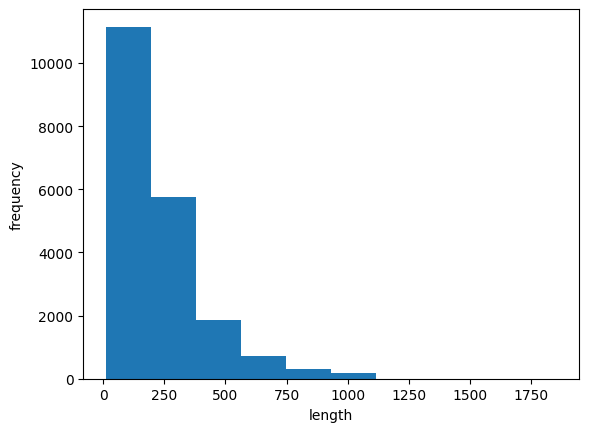

In [9]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [11]:
print(train_seq.shape)

(20000, 100)


In [12]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [13]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [14]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94 205   2  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [15]:
val_seq = pad_sequences(val_input, maxlen=100)

In [16]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [17]:
train_oh = keras.utils.to_categorical(train_seq)

In [18]:
print(train_oh.shape)
# (20000, 100)의 데이터를 원 핫 인코딩으로 변경하여 0~300개의 데이터가 배열로 전환
# (20000, 100, 300)

(20000, 100, 300)


In [19]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [20]:
print(np.sum(train_oh[0][0]))

1.0


In [21]:
val_oh = keras.utils.to_categorical(val_seq)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
# 최상의 모델 저장
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 22s 64ms/step - loss: 0.7021 - accuracy: 0.5032 - val_loss: 0.7014 - val_accuracy: 0.4970
Epoch 2/100
  5/313 [..............................] - ETA: 8s - loss: 0.6881 - accuracy: 0.5375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 11s 34ms/step - loss: 0.6977 - accuracy: 0.5054 - val_loss: 0.6983 - val_accuracy: 0.4976
Epoch 3/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6950 - accuracy: 0.5076 - val_loss: 0.6965 - val_accuracy: 0.5052
Epoch 4/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6932 - accuracy: 0.5104 - val_loss: 0.6953 - val_accuracy: 0.5080
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6918 - accuracy: 0.5166 - val_loss: 0.6944 - val_accuracy: 0.5102
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6907 - accuracy: 0.5221 - val_loss: 0.6936 - val_accuracy: 0.5136
Epoch 7/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6896 - accuracy: 0.5258 - val_loss: 0.6927 - val_accuracy: 0.5162
Epoch 8/100
313/313 [==============================] - 11s 34ms/step - loss: 0.6886 - accuracy: 0.5310 - val_loss: 0.6920 - val_accuracy: 0.52

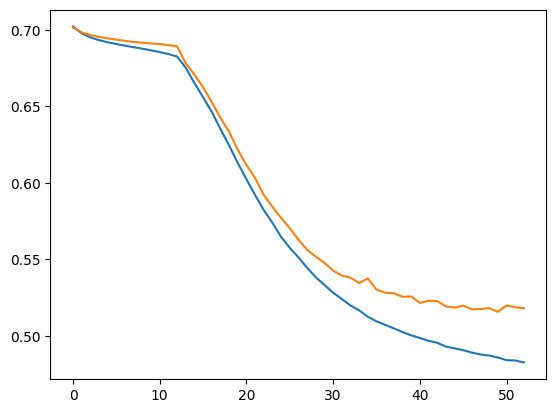

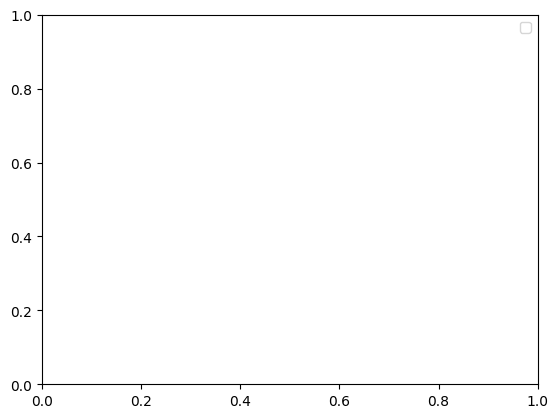

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show('epoch')
plt.show('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
print(train_seq.nbytes, train_oh.nbytes)

8000000 2400000000


In [31]:
# 순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 단어 임베딩
# 각 단어를 고정된 실수 벡터로 바꾸어줌
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [30]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           4800      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 23ms/step - loss: 0.6922 - accuracy: 0.5196 - val_loss: 0.6814 - val_accuracy: 0.5716
Epoch 2/100
  7/313 [..............................] - ETA: 5s - loss: 0.6767 - accuracy: 0.5625

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6612 - accuracy: 0.6217 - val_loss: 0.6472 - val_accuracy: 0.6548
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6298 - accuracy: 0.6792 - val_loss: 0.6151 - val_accuracy: 0.6972
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5993 - accuracy: 0.7086 - val_loss: 0.5917 - val_accuracy: 0.7096
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5799 - accuracy: 0.7198 - val_loss: 0.5812 - val_accuracy: 0.7202
Epoch 6/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5632 - accuracy: 0.7319 - val_loss: 0.5669 - val_accuracy: 0.7230
Epoch 7/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5541 - accuracy: 0.7370 - val_loss: 0.5621 - val_accuracy: 0.7274
Epoch 8/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5441 - accuracy: 0.7411 - val_loss: 0.5511 - val_accuracy: 0.7286
Epoc

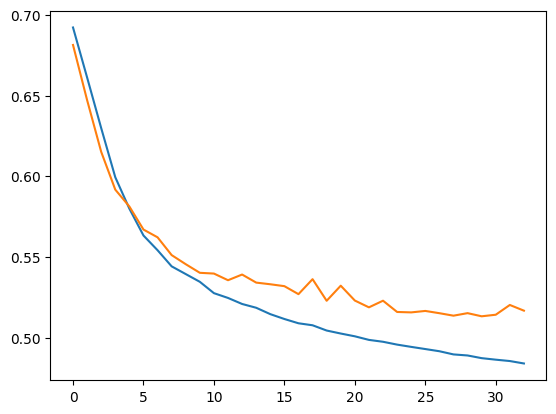

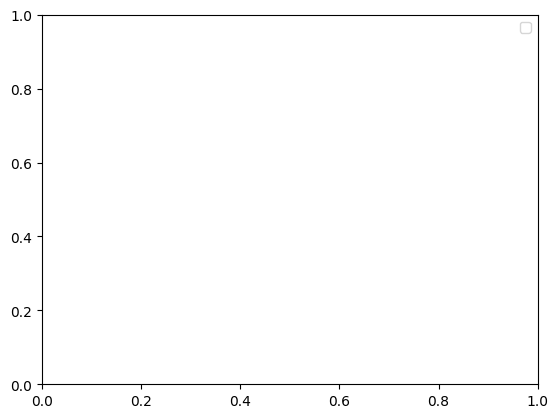

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show('epoch')
plt.show('loss')
plt.legend(['train', 'val'])
plt.show()
# 검증 손실은 더 감소가 되지 않아 조기 종료
# 하지만 훈련 손실이 계속 감소 -> 다음에 이것에 대해 해결